# Exploratory Data Analysis - Titanic

###### Importing Libraries

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

##### Importing Dataset

In [107]:
train = pd.read_csv('train.csv')

In [108]:
33train.head()

SyntaxError: invalid syntax (<ipython-input-108-25f50f63d7de>, line 1)

### Check for Missing Data

In [109]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

##### Visualization technique to identify missing values

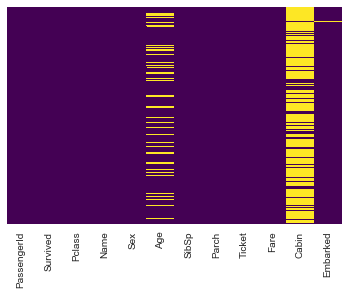

In [110]:
sns.heatmap(train.isnull(),yticklabels = False, cbar = False, cmap = 'viridis')

###### A small percentage of age values are missing. They can be catered using data ampuration techniques, but there is large chunk of data missing in the cabin column. It can either be dropped form the analysis or transformed into another format.

#### Survival Stats

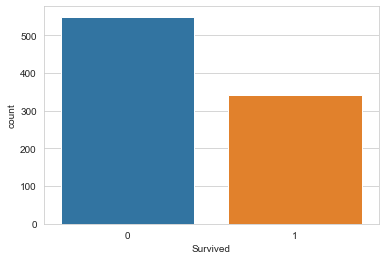

In [111]:
sns.countplot(x = 'Survived', data = train)
sns.set_style('whitegrid')

#### Survival compared with Gender of passenger

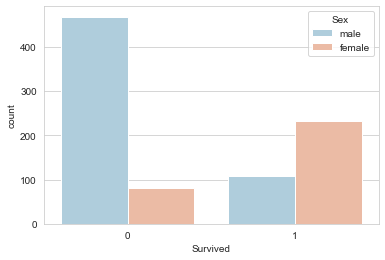

In [112]:
sns.countplot(x = 'Survived',hue = 'Sex', data = train, palette = 'RdBu_r')
sns.set_style('whitegrid')

##### Survival compared with Passenger Class

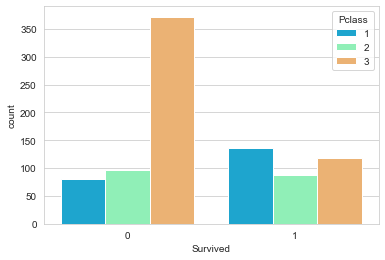

In [113]:
sns.countplot(x = 'Survived',hue = 'Pclass', data = train, palette = 'rainbow')
sns.set_style('whitegrid')

#### Distribution of Age of the passengers

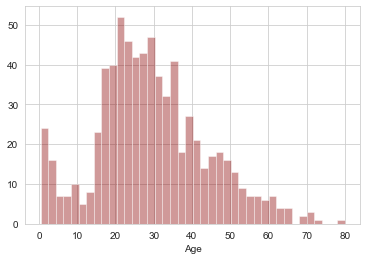

In [114]:
sns.distplot(train['Age'].dropna(),color = 'darkred', bins = 40, kde = False)

#### Passengers with siblings and/or spouse count

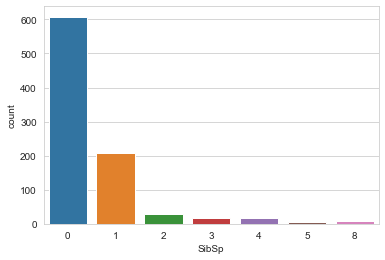

In [115]:
sns.countplot(x = 'SibSp', data = train)

#### Fare histogram

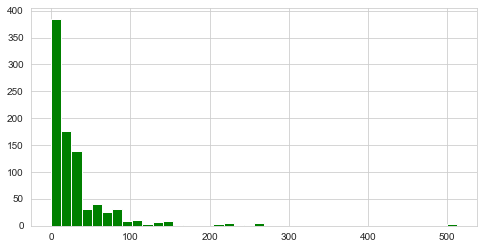

In [116]:
train['Fare'].hist(color = 'green', bins = 40 , figsize = (8,4))

## Data Cleaning

##### To fill the missing data in the 'Age' column, We can use the mean of the age of the passanger. Futher, We can break down the means based on the passanger class

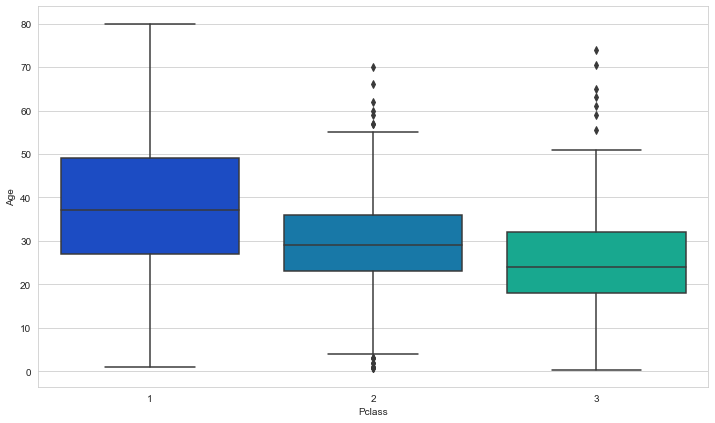

In [117]:
plt.figure(figsize = (12,7))
sns.boxplot(x = 'Pclass', y = 'Age', data = train, palette = 'winter')

##### Create a function to fill up the missing age values

In [118]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols [1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        
        elif Pclass == 2:
            return 29
        
        else :
            return 24
    
    else:
        return Age

##### Applying to function to fill up the missinge age values

In [119]:
train['Age'] = train [['Age','Pclass']].apply(impute_age,axis = 1)

##### Checking the heatmap again

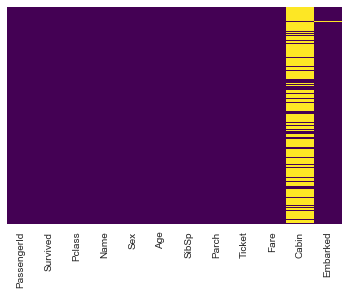

In [120]:
sns.heatmap(train.isnull(),yticklabels = False, cbar = False, cmap = 'viridis')

### Dropping the 'Cabin' column

In [121]:
train.drop('Cabin', axis = 1, inplace = True)

In [122]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


### Using Catagorical dummy variables for 'Sex' & 'Embarked'

In [123]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


In [124]:
pd.get_dummies(train['Embarked'], drop_first = True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


##### Creating new columns

In [125]:
sex = pd.get_dummies(train['Sex'], drop_first = True)
embark = pd.get_dummies(train['Embarked'], drop_first = True)

##### Dropping the original columns

In [126]:
train.drop(['Name', 'Ticket', 'Embarked', 'Sex'], axis = 1, inplace = True)
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


##### Concatination the newly created categorical features

In [127]:
train = pd.concat([train, sex, embark], axis = 1)
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


### Train Test Split

In [128]:
train.drop('Survived', axis = 1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1


In [129]:
train['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [130]:
from sklearn.model_selection import train_test_split

In [131]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis = 1), train['Survived'], test_size = 0.30, random_state = 30) 

## Training and Predecting

In [132]:
from sklearn.linear_model import LogisticRegression

In [133]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [134]:
prediction = logmodel.predict(X_test)

In [135]:
from sklearn.metrics import confusion_matrix

In [136]:
accuracy = confusion_matrix(y_test,prediction)

In [137]:
accuracy

array([[141,  19],
       [ 36,  72]], dtype=int64)

In [138]:
from sklearn.metrics import accuracy_score

In [139]:
accuracy = accuracy_score(y_test,prediction)
accuracy

0.7947761194029851

In [140]:
prediction

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0], dtype=int64)

---